<a href="https://colab.research.google.com/github/anushkah39/Customer_Churn_Prediction/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Churn Prediction in Telecom**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### **Step 1: Dataset Loading and Initial Exploration**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows to see the data structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 1.1: Inspecting Data Types and Missing Values**

In [ ]:
# Display information about columns, data types, and any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Step 1.2: Statistical Summary of Numerical Columns**

In [ ]:
# Display basic statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### **Step 2: Data Preprocessing**

**Step 2.1: Drop the customerID Column and Convert TotalCharges to Numeric**

In [ ]:
# Drop the customerID column as it is not useful for prediction
df = df.drop(columns=['customerID'])

# Convert TotalCharges to numeric, setting errors='coerce' to handle any non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Display any rows where TotalCharges has become NaN to inspect them
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Step 2.2: Fill Missing TotalCharges Values**

In [ ]:
# Fill missing TotalCharges values with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify there are no more missing values in TotalCharges
df['TotalCharges'].isna().sum()

0

**Step 2.3: Encoding Categorical Variables**

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of binary categorical columns to encode
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Encode binary columns
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-hot encode multi-class categorical columns
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod'])

# Check the first few rows to verify encoding
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


### **Step 3: Exploratory Data Analysis (EDA)**

**Step 3.1: Visualize the Distribution of Churn**

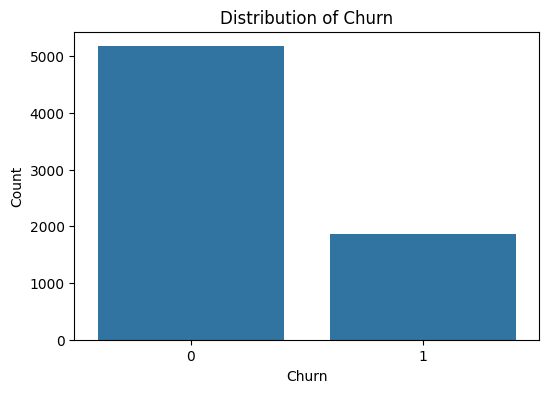

In [ ]:
# Plot distribution of Churn values
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

**Step 3.2: Correlation Heatmap**

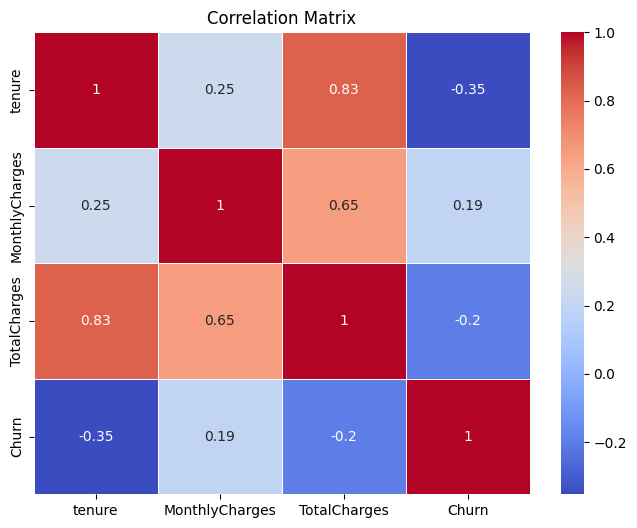

In [ ]:
# Compute the correlation matrix
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Step 3.3: Visualize Key Features with Churn**

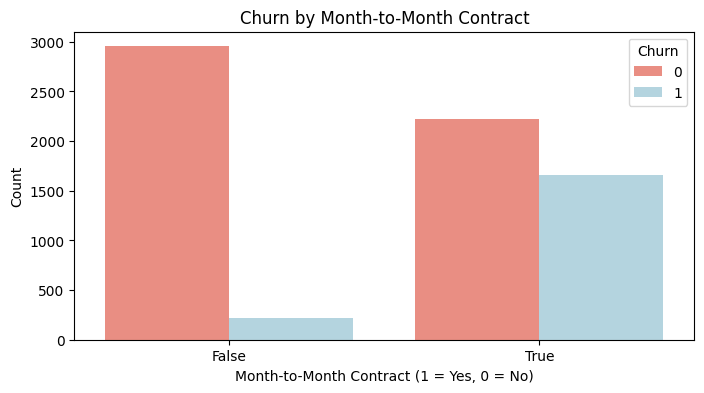

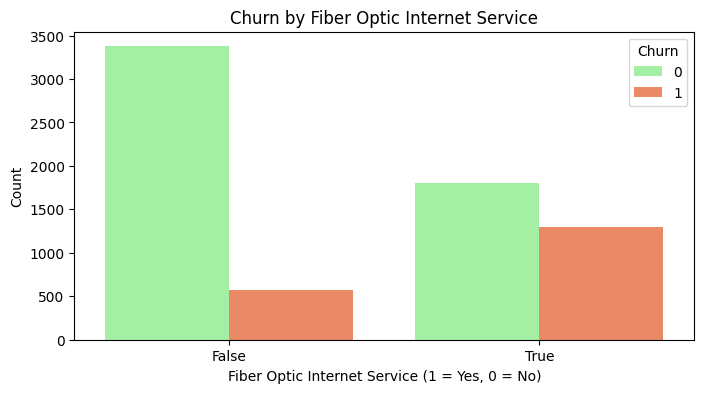

In [ ]:
# Plot churn by Contract type
plt.figure(figsize=(8, 4))
sns.countplot(x='Contract_Month-to-month', hue='Churn', data=df, palette=['salmon', 'lightblue'])
plt.title('Churn by Month-to-Month Contract')
plt.xlabel('Month-to-Month Contract (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Plot churn by Internet Service type (DSL, Fiber Optic, etc.)
plt.figure(figsize=(8, 4))
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df, palette=['#98FB98', 'coral'])
plt.title('Churn by Fiber Optic Internet Service')
plt.xlabel('Fiber Optic Internet Service (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

### **Step 4: Feature Selection and Preparation**

**Step 4.1: Select Relevant Features**

In [ ]:
# Selecting relevant features based on EDA
selected_features = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'InternetService_Fiber optic', 'InternetService_DSL', 'InternetService_No',
    'Churn'  # Including the target variable
]

# Creating a new DataFrame with only the selected features
df_selected = df[selected_features]
df_selected.head()

,tenure,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_DSL,InternetService_No,Churn
0,1,29.85,29.85,True,False,False,False,True,False,0
1,34,56.95,1889.50,False,True,False,False,True,False,0
2,2,53.85,108.15,True,False,False,False,True,False,1
3,45,42.30,1840.75,False,True,False,False,True,False,0
4,2,70.70,151.65,True,False,False,True,False,False,1


**Step 4.2: Scale Numerical Features**

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the numerical columns
df_selected.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df_selected[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

# Display the first few rows to confirm scaling
df_selected.head()

<ipython-input-12-aab6b3921ef6>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01388889 0.47222222 0.02777778 ... 0.15277778 0.05555556 0.91666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_selected.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(


,tenure,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_DSL,InternetService_No,Churn
0,0.013889,0.115423,0.003437,True,False,False,False,True,False,0
1,0.472222,0.385075,0.217564,False,True,False,False,True,False,0
2,0.027778,0.354229,0.012453,True,False,False,False,True,False,1
3,0.625000,0.239303,0.211951,False,True,False,False,True,False,0
4,0.027778,0.521891,0.017462,True,False,False,True,False,False,1


### **Step 5: Model Training and Evaluation**

**5.1: Split Data into Training and Test Sets**

In [ ]:
# Define features (X) and target (y)
X = df_selected.drop('Churn', axis=1)
y = df_selected['Churn']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 9), (1409, 9), (5634,), (1409,))

**Step 5.2: Train the Logistic Regression Model**

In [ ]:
# Logistic Regression Model
print("Logistic Regression Model Performance:")
print("=" * 40)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print metrics for Logistic Regression
print(f"Accuracy       : {accuracy_logreg:}")
print(f"Precision      : {precision_logreg:}")
print(f"Recall         : {recall_logreg:}")
print(f"F1 Score       : {f1_logreg:}")
print("Confusion Matrix:")
print(conf_matrix_logreg)

Logistic Regression Model Performance:
Accuracy       : 0.8026969481902059
Precision      : 0.6588628762541806
Recall         : 0.5281501340482574
F1 Score       : 0.5863095238095238
Confusion Matrix:
[[934 102]
 [176 197]]


**Step 5.3: Train the Decision Tree Classifier**

In [ ]:
# Decision Tree Model
print("Decision Tree Model Performance:")
print("=" * 40)

# Initialize the Decision Tree model with a max depth to prevent overfitting
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model on the training data
tree_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_clf.predict(X_test)

# Evaluate the model's performance
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Print metrics for Decision Tree
print(f"Accuracy       : {accuracy_tree:}")
print(f"Precision      : {precision_tree:}")
print(f"Recall         : {recall_tree:}")
print(f"F1 Score       : {f1_tree:}")
print("Confusion Matrix:")
print(conf_matrix_tree)

Decision Tree Model Performance:
Accuracy       : 0.7970191625266146
Precision      : 0.6570397111913358
Recall         : 0.4879356568364611
F1 Score       : 0.56
Confusion Matrix:
[[941  95]
 [191 182]]


**Step 5.4: Train the Random Forest Classifier**

In [ ]:
# Random Forest Classifier
print("Random Forest Model Performance:")
print("=" * 40)

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display results
print(f"Accuracy       : {accuracy_rf:}")
print(f"Precision      : {precision_rf:}")
print(f"Recall         : {recall_rf:}")
print(f"F1 Score       : {f1_rf:}")
print("Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Model Performance:
Accuracy       : 0.7707594038325053
Precision      : 0.5806451612903226
Recall         : 0.48257372654155495
F1 Score       : 0.527086383601757
Confusion Matrix:
[[906 130]
 [193 180]]


**Step 5.5: Train the Gradient Boosting Classifier**

In [ ]:
#  Gradient Boosting Classifier
print("Gradient Boosting Model Performance:")
print("=" * 40)

# Initialize the model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_clf.predict(X_test)

# Calculate metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display results
print(f"Accuracy       : {accuracy_gb:}")
print(f"Precision      : {precision_gb:}")
print(f"Recall         : {recall_gb:}")
print(f"F1 Score       : {f1_gb:}")
print("Confusion Matrix:")
print(conf_matrix_gb)

Gradient Boosting Model Performance:
Accuracy       : 0.8048261178140526
Precision      : 0.6713286713286714
Recall         : 0.514745308310992
F1 Score       : 0.582701062215478
Confusion Matrix:
[[942  94]
 [181 192]]


**Step 5.6: Comparison Summary of All Models**

In [ ]:
# Summary Comparison for All Models
print("Summary Comparison of Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting:")
print("=" * 90)
print(f"{'Metric':<20}{'Logistic Regression':<22}{'Decision Tree':<15}{'Random Forest':<15}{'Gradient Boosting':<15}")
print("-" * 90)

# Model metrics already calculated previously
print(f"{'Accuracy':<20}{accuracy_logreg:.2f}{accuracy_tree:>22.2f}{accuracy_rf:>15.2f}{accuracy_gb:>15.2f}")
print(f"{'Precision':<20}{precision_logreg:.2f}{precision_tree:>22.2f}{precision_rf:>15.2f}{precision_gb:>15.2f}")
print(f"{'Recall':<20}{recall_logreg:.2f}{recall_tree:>22.2f}{recall_rf:>15.2f}{recall_gb:>15.2f}")
print(f"{'F1 Score':<20}{f1_logreg:.2f}{f1_tree:>22.2f}{f1_rf:>15.2f}{f1_gb:>15.2f}")

Summary Comparison of Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting:
Metric              Logistic Regression   Decision Tree  Random Forest  Gradient Boosting
------------------------------------------------------------------------------------------
Accuracy            0.80                  0.80           0.77           0.80
Precision           0.66                  0.66           0.58           0.67
Recall              0.53                  0.49           0.48           0.51
F1 Score            0.59                  0.56           0.53           0.58


**Step 5.7: Confusion Matrix Visualization**

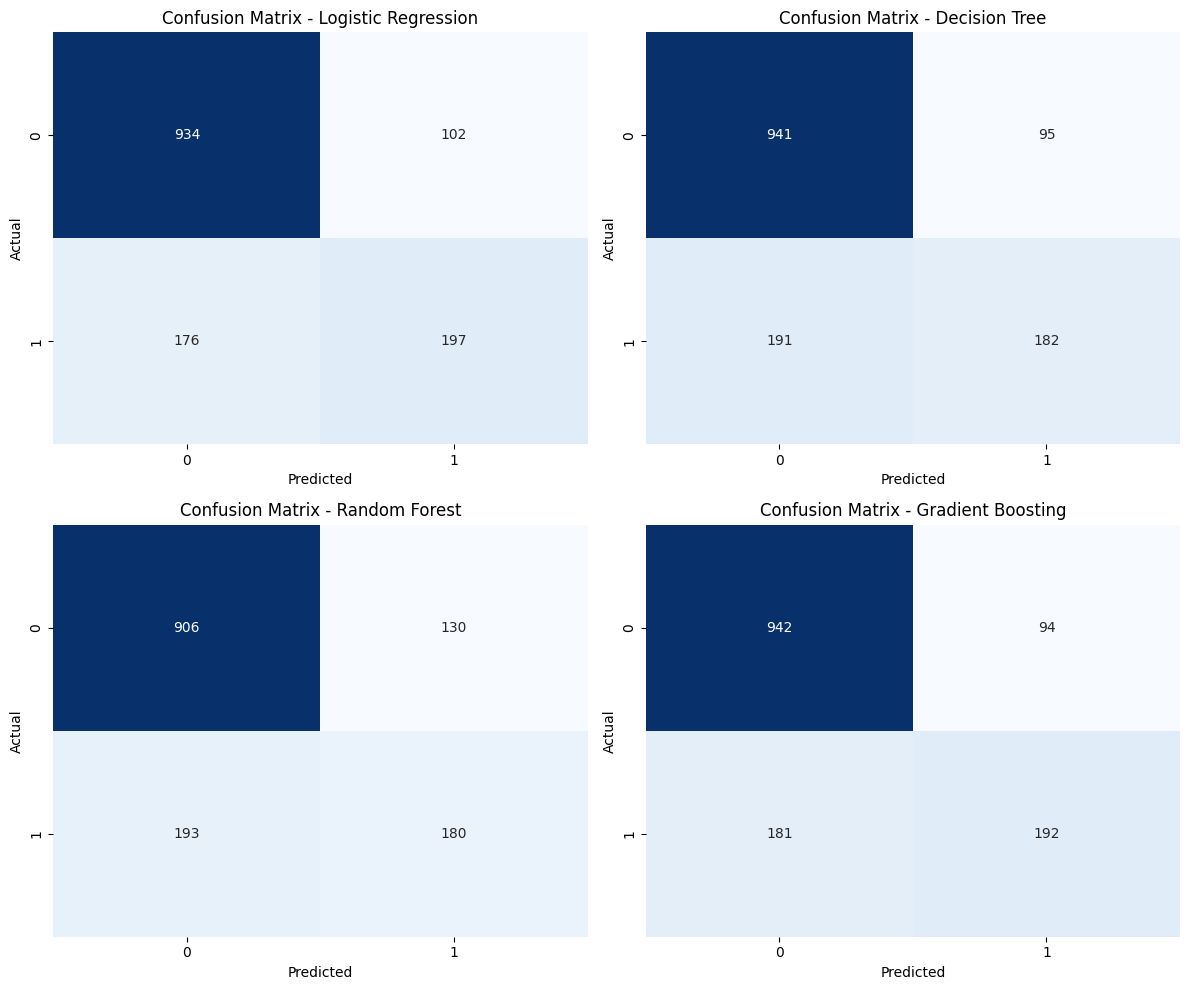

In [ ]:
# List of models and their corresponding predictions and titles
models = [
    ('Logistic Regression', y_pred_logreg),
    ('Decision Tree', y_pred_tree),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb)
]

# Plot confusion matrices for each model
plt.figure(figsize=(12, 10))
for i, (model_name, y_pred) in enumerate(models, 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### **Step 6: Model Interpretation**

**Step 6.1: Logistic Regression Coefficients**

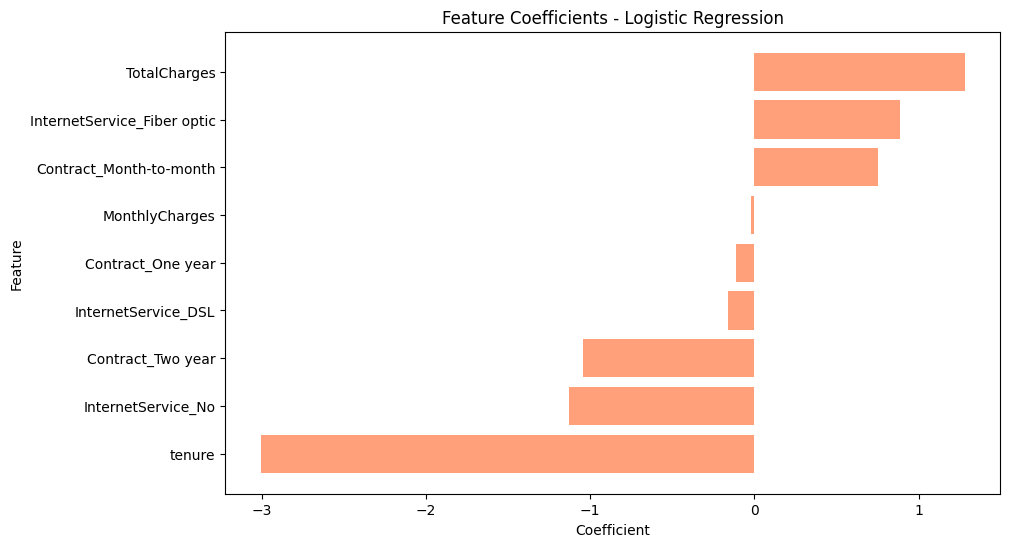

In [ ]:
# Retrieve the coefficients from the Logistic Regression model
coefficients = log_reg.coef_[0]

# Create a DataFrame for better readability
features_logreg = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(features_logreg['Feature'], features_logreg['Coefficient'], color="lightsalmon")
plt.gca().invert_yaxis()  # Highest positive impact at the top
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

**Step 6.2: Feature Importance for Decision Tree**

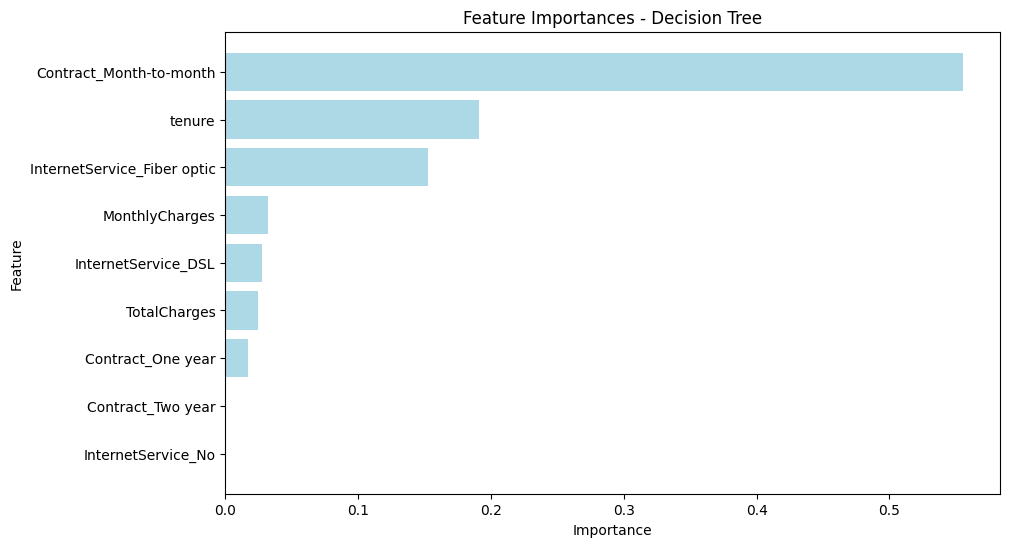

In [ ]:
# Retrieve feature importances from the Decision Tree model
feature_importances_tree = tree_clf.feature_importances_

# Create a DataFrame for better readability
features_tree = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_tree
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_tree['Feature'], features_tree['Importance'], color="lightblue")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title("Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Step 6.3: Feature Importance for Random Forest**

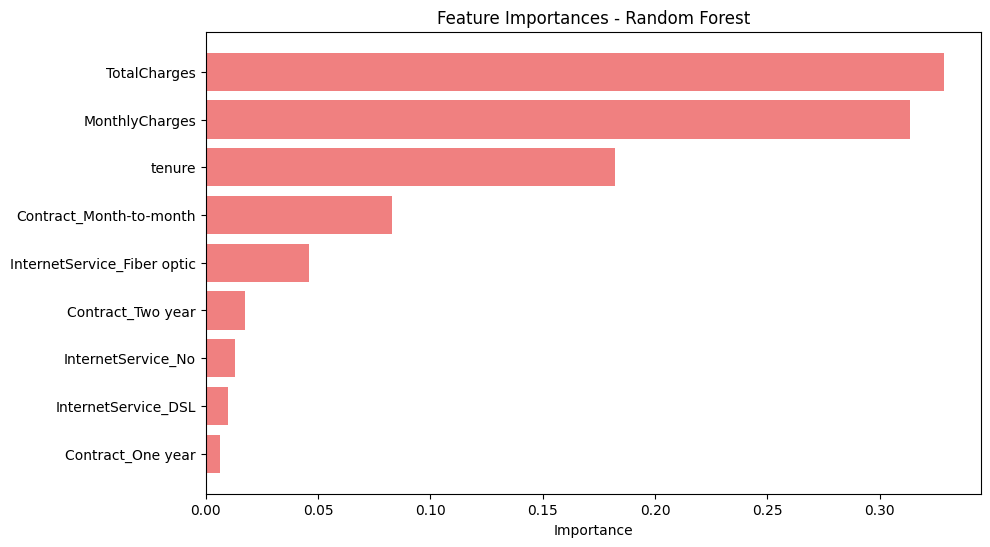

In [ ]:
# Get feature importances and sort them
rf_importances = rf_clf.feature_importances_
features = X_train.columns
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='lightcoral')
plt.xlabel("Importance")
plt.title("Feature Importances - Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance on top
plt.show()

**Step 6.4: Feature Importance for Gradient Boosting**

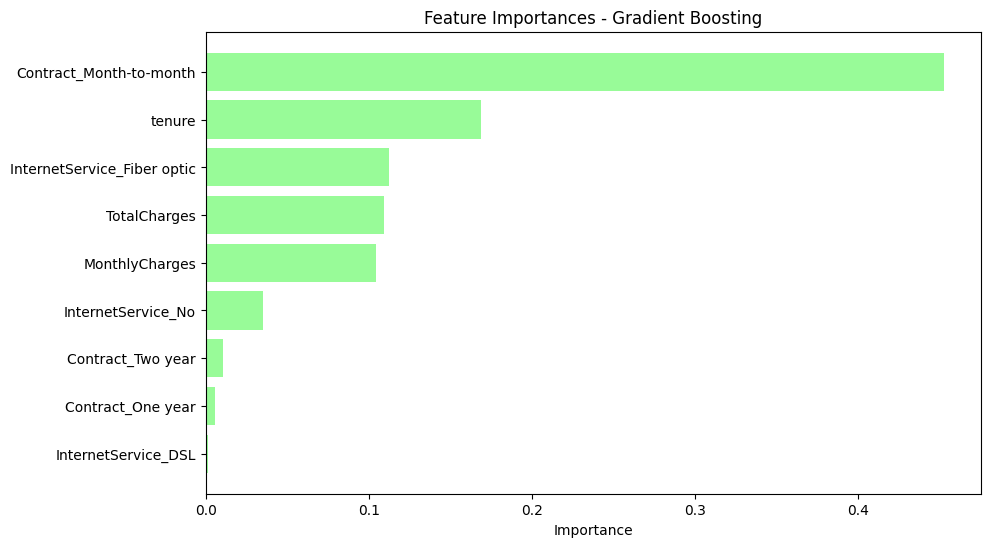

In [ ]:
# Get feature importances and sort them
gb_importances = gb_clf.feature_importances_
gb_importance_df = pd.DataFrame({'Feature': features, 'Importance': gb_importances})
gb_importance_df = gb_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(gb_importance_df['Feature'], gb_importance_df['Importance'], color='#98FB98')
plt.xlabel("Importance")
plt.title("Feature Importances - Gradient Boosting")
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance on top
plt.show()